In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
x = tf.Variable(3.0)

with tf.GradientTape() as tape:
    y = x**2

In [3]:
dy_dx = tape.gradient(y, x)
print(dy_dx)

tf.Tensor(6.0, shape=(), dtype=float32)


In [4]:
w = tf.Variable(tf.random.normal((3, 2)), name='w')
w

<tf.Variable 'w:0' shape=(3, 2) dtype=float32, numpy=
array([[-0.78568846,  0.591777  ],
       [-0.59852225, -0.8046522 ],
       [ 0.48884556,  0.86965966]], dtype=float32)>

In [5]:
b = tf.Variable(tf.zeros(2, dtype=tf.float32), name='b')
b

<tf.Variable 'b:0' shape=(2,) dtype=float32, numpy=array([0., 0.], dtype=float32)>

In [6]:
x = [[1., 2., 3.]]
x

[[1.0, 2.0, 3.0]]

In [14]:
with tf.GradientTape() as tape:
    y = x @ w + b
    loss = tf.reduce_mean(y**2)

In [8]:
[dl_dw, dl_db] = tape.gradient(loss, [w, b])

In [9]:
print(w.shape)
print(dl_dw.shape)

(3, 2)
(3, 2)


In [10]:
print(b.shape)
print(dl_db.shape)

(2,)
(2,)


In [11]:
print(dl_dw)
print(dl_db)

tf.Tensor(
[[-0.51619637  1.5914516 ]
 [-1.0323927   3.1829033 ]
 [-1.5485891   4.774355  ]], shape=(3, 2), dtype=float32)
tf.Tensor([-0.51619637  1.5914516 ], shape=(2,), dtype=float32)


In [15]:
my_vars = {
    'w': w,
    'b': b
}

grad = tape.gradient(loss, my_vars)
grad

{'b': <tf.Tensor: shape=(2,), dtype=float32, numpy=array([-0.51619637,  1.5914516 ], dtype=float32)>,
 'w': <tf.Tensor: shape=(3, 2), dtype=float32, numpy=
 array([[-0.51619637,  1.5914516 ],
        [-1.0323927 ,  3.1829033 ],
        [-1.5485891 ,  4.774355  ]], dtype=float32)>}

In [16]:
layer = tf.keras.layers.Dense(2, activation='relu')
x = tf.constant([[1., 2., 3.]])

with tf.GradientTape() as tape:
    y = layer(x)
    loss = tf.reduce_mean(y**2)

grad = tape.gradient(loss, layer.trainable_variables)

In [17]:
for var, g in zip(layer.trainable_variables, grad):
    print(f'{var.name}, shape: {g.shape}')

dense/kernel:0, shape: (3, 2)
dense/bias:0, shape: (2,)


In [18]:
x0 = tf.Variable(3.0, name='x0')
x1 = tf.Variable(3.0, name='x1', trainable=False)
x2 = tf.Variable(3.0, name='x2') + 1
x3 = tf.constant(3.0, name='x2')

In [19]:
with tf.GradientTape() as tape:
    y = (x0**2) + (x1**2) + (x2**2)

grad = tape.gradient(y, [x0, x1, x2, x3])
for g in grad:
    print(g)

tf.Tensor(6.0, shape=(), dtype=float32)
None
None
None


In [20]:
[var.name for var in tape.watched_variables()]

['x0:0']

In [21]:
x = tf.constant(3.0)
with tf.GradientTape() as tape:
    tape.watch(x)
    y = x**2

dy_dx = tape.gradient(y, x)
print(dy_dx)

tf.Tensor(6.0, shape=(), dtype=float32)


In [25]:
x0 = tf.Variable(0.0)
x1 = tf.Variable(10.0)

with tf.GradientTape(watch_accessed_variables=False) as tape:
    tape.watch(x1)
    y0 = tf.sin(x0)
    y1 = tf.nn.softplus(x1)
    y = y0 + y1
    ys = tf.reduce_sum(y)

In [26]:
grad = tape.gradient(ys, {'x0': x0, 'x1': x1})
print(grad)

{'x0': None, 'x1': <tf.Tensor: shape=(), dtype=float32, numpy=0.9999546>}


In [27]:
x = tf.constant(3.0)

with tf.GradientTape() as tape:
    tape.watch(x)
    y = x*x
    z = y*y

print(tape.gradient(z, y))

tf.Tensor(18.0, shape=(), dtype=float32)


In [28]:
x = tf.constant([1, 3.0])
with tf.GradientTape(persistent=True) as tape:
    tape.watch(x)
    y = x*x
    z = y*y

print(tape.gradient(z, x).numpy())
print(tape.gradient(y, x).numpy())

[  4. 108.]
[2. 6.]


In [29]:
del tape

In [30]:
x = tf.Variable(2.0)

with tf.GradientTape(persistent=True) as tape:
    y0 = x**2
    y1 = 1 / x

print(tape.gradient(y0, x).numpy())
print(tape.gradient(y1, x).numpy())

4.0
-0.25


In [31]:
x = tf.Variable(2.0)

with tf.GradientTape() as tape:
    y0 = x**2
    y1 = 1/x

print(tape.gradient({'y0': y0, 'y1': y1}, x).numpy())

3.75


In [32]:
x = tf.Variable(2.0)

with tf.GradientTape() as tape:
    y = x * [2., 4.]

print(tape.gradient(y, x).numpy())

6.0


In [33]:
x = tf.linspace(-10.0, 10.0, 200+1)

with tf.GradientTape() as tape:
    tape.watch(x)
    y = tf.nn.sigmoid(x)

dy_dx = tape.gradient(y, x)

In [ ]:
dy_dx

Text(0.5, 0, 'x')

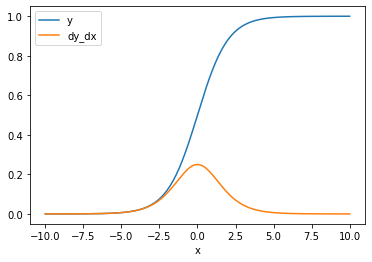

In [35]:
plt.plot(x, y, label='y')
plt.plot(x, dy_dx, label='dy_dx')
plt.legend()
plt.xlabel('x')

In [36]:
x = tf.constant(1.0)

v0 = tf.Variable(2.0)
v1 = tf.Variable(2.0)

with tf.GradientTape(persistent=True) as tape:
    tape.watch(x)
    if x >= 0.0:
        result = v0
    else:
        result = v1**2

dv0, dv1 = tape.gradient(result, [v0, v1])
print(dv0)
print(dv1)

tf.Tensor(1.0, shape=(), dtype=float32)
None


In [38]:
dx = tape.gradient(result, x)
print(dx)

None


In [39]:
x = tf.Variable(2.)
y = tf.Variable(3.)

with tf.GradientTape() as tape:
    z = y*y

print(tape.gradient(z, x))

None


In [40]:
x = tf.Variable(2.0)

for epoch in range(2):
    with tf.GradientTape() as tape:
        y = x + 1
    
    print(type(x).__name__, ":", tape.gradient(y, x))
    x = x + 1

ResourceVariable : tf.Tensor(1.0, shape=(), dtype=float32)
EagerTensor : None


In [41]:
x = tf.Variable([[1.0, 2.0], [3.0, 4.0]], dtype=tf.float32)
with tf.GradientTape() as tape:
    x2 = x**2

    y = np.mean(x2, axis=0)
    y = tf.reduce_mean(y, axis=0)

print(tape.gradient(y, x))

None


In [42]:
x = tf.constant(10)

with tf.GradientTape() as g:
    g.watch(x)

    y = x*x

print(g.gradient(y, x))

None


In [43]:
x0 = tf.Variable(3.0)
x1 = tf.Variable(0.0)

with tf.GradientTape() as tape:
    x1.assign_add(x0)

    y = x1**2

print(tape.gradient(y, x0))

None


In [44]:
image = tf.Variable([[[0.5, 0.0, 0.0]]])
delta = tf.Variable(0.1)

with tf.GradientTape() as tape:
    new_image = tf.image.adjust_contrast(image, delta)

try:
    print(tape.gradient(new_image, image))
    assert False
except LookupError as e:
    print(f'{type(e).__name__}: {e}')

LookupError: gradient registry has no entry for: AdjustContrastv2


In [45]:
x = tf.Variable([2., 2.])
y = tf.Variable(3.)

with tf.GradientTape() as tape:
    z = y**2

print(tape.gradient(z, x, unconnected_gradients=tf.UnconnectedGradients.ZERO))

tf.Tensor([0. 0.], shape=(2,), dtype=float32)
